# Herramientas básicas

# 1. Cargamos las librerías

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import sklearn.linear_model

# 2. Cargamos los datos

In [2]:
oecd_satisfaccion_vital = pd.read_csv('00_BLI_22032022163103278.csv', sep=';')
oecd_satisfaccion_vital.head()

,Country,Indicator,Value
0,Australia,Life satisfaction,7.1
1,Austria,Life satisfaction,7.2
2,Belgium,Life satisfaction,6.8
3,Canada,Life satisfaction,7.0
4,Czech Republic,Life satisfaction,6.9


In [3]:
satis = oecd_satisfaccion_vital[['Country','Value']]
satis.rename(columns={'Country':'pais','Value':'satisfaccion'},inplace=True)
satis

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,pais,satisfaccion
0,Australia,7.1
1,Austria,7.2
2,Belgium,6.8
3,Canada,7.0
4,Czech Republic,6.9
5,Denmark,7.5
6,Finland,7.9
7,France,6.7
8,Germany,7.3
9,Greece,5.8


In [4]:
#PBI
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
pbi = pd.read_html(url)

In [5]:
pbi_x_cap = pbi[2]
pbi_x_cap

Country/Territory    Region      IMF[1]            United Nations[12]  \
    Country/Territory    Region    Estimate       Year           Estimate   
0       United States  Americas  22939580.0       2021         20893746.0   
1               China      Asia  16862979.0  [n 2]2021         14722801.0   
2               Japan      Asia   5103110.0       2021          5057759.0   
3             Germany    Europe   4230172.0       2021          3846414.0   
4      United Kingdom    Europe   3108416.0       2021          2764198.0   
..                ...       ...         ...        ...                ...   
211          Kiribati   Oceania       232.0       2021              181.0   
212             Palau   Oceania       208.0       2021              264.0   
213             Nauru   Oceania       133.0       2021              135.0   
214        Montserrat  Americas         NaN        NaN               68.0   
215            Tuvalu   Oceania        65.0       2021               55.0   

               World Bank[13][14]        
          Year           Estimate  Year  
0         2020         20936600.0  2020  
1    [n 3]2020         14722731.0  2020  
2         2020          4975415.0  2020  
3         2020          3806060.0  2020  
4         2020          2707744.0  2020  
..         ...                ...   ...  
211       2020              200.0  2020  
212       2020              268.0  2019  
213       2020              118.0  2019  
214       2020                NaN   NaN  
215       2020               49.0  2020  

[216 rows x 8 columns]

In [6]:
datos1=pd.DataFrame(pbi_x_cap['Country/Territory'])
datos1

,Country/Territory
0,United States
1,China
2,Japan
3,Germany
4,United Kingdom
...,...
211,Kiribati
212,Palau
213,Nauru
214,Montserrat


In [7]:
datos2=pd.DataFrame(pbi_x_cap['IMF[1]'])
datos2

,Estimate,Year
0,22939580.0,2021
1,16862979.0,[n 2]2021
2,5103110.0,2021
3,4230172.0,2021
4,3108416.0,2021
...,...,...
211,232.0,2021
212,208.0,2021
213,133.0,2021
214,NaN,NaN


In [8]:
datos3=pd.DataFrame(datos2['Estimate'])
datos3

,Estimate
0,22939580.0
1,16862979.0
2,5103110.0
3,4230172.0
4,3108416.0
...,...
211,232.0
212,208.0
213,133.0
214,NaN


In [9]:
datos1[0:]

,Country/Territory
0,United States
1,China
2,Japan
3,Germany
4,United Kingdom
...,...
211,Kiribati
212,Palau
213,Nauru
214,Montserrat


In [10]:
pbi_data=pd.merge(datos1, datos3,how='inner',left_index=True, right_index=True)
pbi_data

,Country/Territory,Estimate
0,United States,22939580.0
1,China,16862979.0
2,Japan,5103110.0
3,Germany,4230172.0
4,United Kingdom,3108416.0
...,...,...
211,Kiribati,232.0
212,Palau,208.0
213,Nauru,133.0
214,Montserrat,NaN


In [12]:
#datos=pd.DataFrame('datos1','datos3')
#datos

#concat([datos1, datos3],axis=1)
#datos1

In [13]:
#cambiando de nombre de "Country/Territory" a "pais"
pbi_data.rename(columns={'Country/Territory':'pais','Estimate':'pbi'},inplace=True)
pbi_data

,pais,pbi
0,United States,22939580.0
1,China,16862979.0
2,Japan,5103110.0
3,Germany,4230172.0
4,United Kingdom,3108416.0
...,...,...
211,Kiribati,232.0
212,Palau,208.0
213,Nauru,133.0
214,Montserrat,NaN


In [14]:
pbi_data.set_index('pais',inplace = True)
pbi_data

,pbi
pais,
United States,22939580.0
China,16862979.0
Japan,5103110.0
Germany,4230172.0
United Kingdom,3108416.0
...,...
Kiribati,232.0
Palau,208.0
Nauru,133.0


In [15]:
satis.set_index('pais',inplace = True)
satis

,satisfaccion
pais,
Australia,7.1
Austria,7.2
Belgium,6.8
Canada,7.0
Czech Republic,6.9
Denmark,7.5
Finland,7.9
France,6.7
Germany,7.3


In [16]:
# Buscando la correspondencia entre pbi_data y satis
tabla = pd.merge(pbi_data,satis,how='right',left_index=True,right_index=True)
tabla

,pbi,satisfaccion
pais,,
Australia,1610556.0,7.1
Austria,481209.0,7.2
Belgium,581848.0,6.8
Canada,2015983.0,7.0
Czech Republic,276914.0,6.9
Denmark,396666.0,7.5
Finland,296016.0,7.9
France,2940428.0,6.7
Germany,4230172.0,7.3


In [17]:
tabla = tabla.dropna()
tabla

,pbi,satisfaccion
pais,,
Australia,1610556.0,7.1
Austria,481209.0,7.2
Belgium,581848.0,6.8
Canada,2015983.0,7.0
Czech Republic,276914.0,6.9
Denmark,396666.0,7.5
Finland,296016.0,7.9
France,2940428.0,6.7
Germany,4230172.0,7.3


In [18]:
tabla.max()
#pbi             22939580.0
#satisfaccion           7.9

pbi             22939580.0
satisfaccion           7.9
dtype: float64

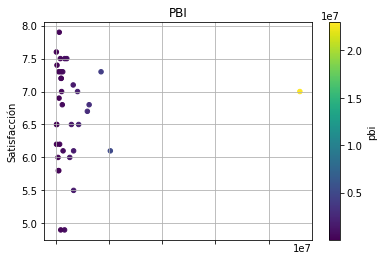

In [20]:
ax1 = tabla.plot.scatter(x='pbi', y='satisfaccion',c='pbi', colormap='viridis')
plt.xlabel('$X$')
plt.ylabel('Satisfacción')
plt.title('PBI')
plt.grid(True)

In [21]:
tabla['pbi_ok'] = np.where(tabla['pbi']>20000000,2293958,tabla['pbi'])
tabla

<ipython-input-21-23473d3c02ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla['pbi_ok'] = np.where(tabla['pbi']>20000000,2293958,tabla['pbi'])


,pbi,satisfaccion,pbi_ok
pais,,,
Australia,1610556.0,7.1,1610556.0
Austria,481209.0,7.2,481209.0
Belgium,581848.0,6.8,581848.0
Canada,2015983.0,7.0,2015983.0
Czech Republic,276914.0,6.9,276914.0
Denmark,396666.0,7.5,396666.0
Finland,296016.0,7.9,296016.0
France,2940428.0,6.7,2940428.0
Germany,4230172.0,7.3,4230172.0


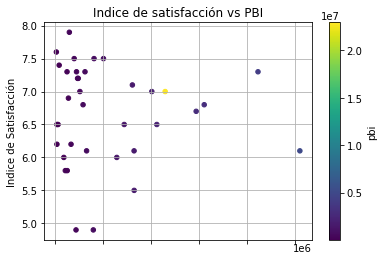

In [26]:
ax2 = tabla.plot.scatter(x='pbi_ok', y='satisfaccion',c='pbi', colormap='viridis')
plt.xlabel('$X$')
plt.ylabel('Indice de Satisfacción')
plt.title('Indice de satisfacción vs PBI')
plt.grid(True)